In [1]:
import numpy as np 
import os
cwd = os.getcwd()
current_path = os.environ['PATH'].strip()
cwd

'C:\\WinPython-64bit-3.4.4.2\\scripts\\deeplearning\\deeplearning'

In [2]:
#=======================================================
# NO NEED TO READ THIS DURING THIS SESSION
#=======================================================
# reason to write this code, Theano relay an extra library(OpenBlAS) to do fast linear algebra operations,
# because this is usually not installed on a given system, we have included these libraries as DLL files along with the assignment files
# but in order for theano to find these libraries, the folder containing the assignment have to be added in the PATH environment 
# variables. this code checks find the current working directory and if it is not yet present in the 
# PATH variable, add it to this variable
if (current_path.find(cwd) == -1):
    new_path = current_path
    if (current_path[-1] != ';'):
        new_path = new_path + ';'
    new_path = new_path + cwd
    os.environ['PATH'] = new_path
print('CURRENT PATH:')
print (os.environ['PATH'])

CURRENT PATH:
C:\WinPython-64bit-3.4.4.2\python-3.4.4.amd64\lib\site-packages\numpy\core;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\Lib\site-packages\PyQt5;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\Lib\site-packages\PyQt4;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\DLLs;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\Scripts;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\..\tools;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\..\tools\mingw32\bin;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\..\tools\R\bin\x64;C:\WinPython-64bit-3.4.4.2\scripts\..\python-3.4.4.amd64\..\tools\Julia\bin;C:\ProgramData\Oracle\Java\javapath;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v7.5\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v7.5\libnvvp;c:\Program Files (x86)\Intel\iCLS Client\;c:\Program Files\Intel\iCLS Client\;C:\WINDOWS\system32;C:\WINDOWS

In [3]:
# the following code import all the libraries needed bt the rest of the documents
#==================================================
# TECHNICAL DETAIL, NO NEED TO READ THIS DURING THIS SESSION
#==================================================
% matplotlib inline
from matplotlib import pyplot as plt
# we use ipywidgets to make the document interactive
from ipywidgets import *
from IPython.display import display, clear_output
# scipy is another important scientific computition library in python
import scipy
# we use skimage library to demonstrate Gabor kernel
from skimage.filters import gabor_kernel

# Theano is the library that we will used to train our neural network
import theano

# the following codes tells theano how to link the OpenBlAS,
theano.config.blas.ldflags = '-L' + cwd + ' -lopenblas'
print ('BLAS linking flags:')
print(theano.config.blas.ldflags)

from theano import tensor as T

# the lasagna is built on top of theano and provide additional convience fucntion that are commonly used in neural network 
# research, the name comes from 'layer' of neural networks and lasagne's primary function is in fact to implement many commonly 
# used neural network
import lasagne
import gzip
import six.moves.cPickle as pickle


BLAS linking flags:
-LC:\WinPython-64bit-3.4.4.2\scripts\deeplearning\deeplearning -lopenblas


1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33 //preprocessor macro 

nvcc fatal   : Cannot find compiler 'cl.exe' in PATH

['nvcc', '-shared', '-O3', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\sandbox\\cuda', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\numpy\\core\\include', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\include', '-IC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\lib\\site-packages\\theano\\gof', '-o', 'C:\\Users\\junfeng\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-Intel64_Family_6_Model_69_Stepping_1_GenuineIntel-3.4.4-64\\cuda_ndarray\\cuda_ndarray.pyd', 'mod.cu', '-LC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64\\libs', '-LC:\\WinPython-64bit-3.4.4.2\\python-3.4.4.amd64', '-lcublas', '-lpython34', '-lcudart']


## Section 1: Gradient descent optimization
to illustrate the concept of gradient descent optimization, we made a artifical dataset where we know the underlying model already. we started with a very simple model
$$ y = bx + a + \epsilon$$ 
Here $x$ is the input, $y$ is the output and $\epsilon$ is some amout of noise added to the output, we can generate a fake dataset using the following dataset

<function __main__.generate_simple_data>

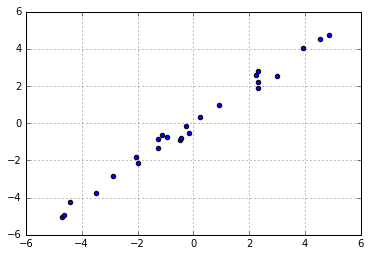

In [4]:
simple_data_x = None
simple_data_y = None
def generate_simple_data(b = 1.0, a = -0.5, noise_level = 1.0, num_points = 25):
    global simple_data_x, simple_data_y
    x_vals = np.random.rand(num_points) * 10 -5 # generate 25 points between -5 and 5
    y_vals = b* x_vals + a # Calculate the non-noisy part of output 
    y_vals = y_vals + (noise_level * np.random.rand(len(x_vals)))
    plt.scatter(x_vals, y_vals)
    plt.grid() # add grid to the plot
    simple_data_x = x_vals
    simple_data_y = y_vals
interact(generate_simple_data, b = (-3.0, 3.0), a = (-3.0, 3.0), noise_level = (0.0, 5.0), num_points = (1, 50))
    
    

## find a polynomial with Theano
let's ask theano to fit a line for us to the above data, we will do this use gradient descent, which basically means we will:
- Guess the initial value for $a$ and $b$
- Repeatively improve $a$ and $b$ slightly in order to find a better solution 
Normally we would just ask python to guess initial values, but below you can set them youself to experiment with different scenarios

<function __main__.set_poly_initial>

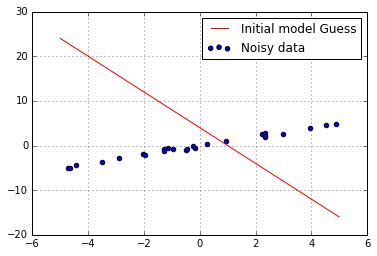

In [5]:
poly_A = None
poly_B = None

poly_A_initial = None
poly_B_initial = None

def set_poly_initial(B = -4, A = 4):
    global poly_A, poly_B, poly_A_initial, poly_B_initial
    if (poly_B is None):
        poly_B = theano.shared(B)
        poly_A = theano.shared(A)
    else:
        poly_B.set_value(B)
        poly_A.set_value(A)
        
    poly_A_initial = A
    poly_B_initial = B
    
    plt.scatter(simple_data_x, simple_data_y)
    plt.grid()
    plt.plot([-5, 5], [-5* B + A, B*5 + A], 'r')
    plt.legend(['Initial model Guess', 'Noisy data'])
interact(set_poly_initial, B = (-5.0, 5.0), A = (-5.0, 5.0))

Now, in using code below, you can experiment with gradient descent. You will have the option of setting learning rate, and then asking the system to train either 1 step or 10 steps. In the left hand figure, you will see the current fit of system, and in the right hand, you will see the 'Error landscape'. The error landscape has its axes the values of A and B, and is colored according to how good a given combination of A and B are fitting the data. Blue regions are regions of good fit, red are regions of poor fit. As system trains, you will see it moves from point to point in the error lanscape. If all goes well, the system will find the lowest point in the landscape.

- explore what happens when you tune learing rate
- explore how the error landscape changes as you change the data that generates earlier

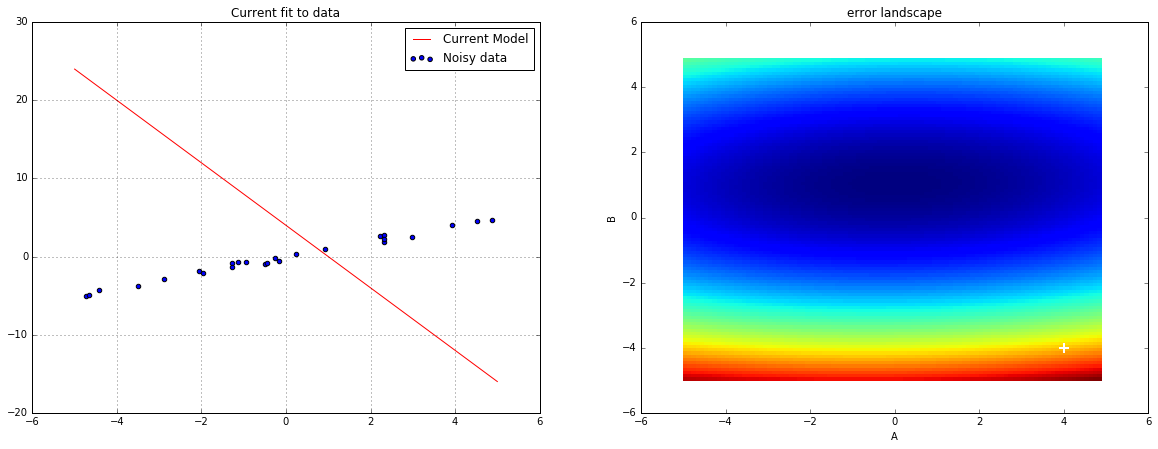

In [6]:
poly_training_func = None
poly_cost_func = None
poly_learning_rate = theano.shared(0.01)
#  the shared function construts so called shared variables, it is called shared variables because its value is shared between many functions
#  the values can be access and modified by .get_value() and .set_value() methods
poly_learning_rate_slider = widgets.FloatSlider(poly_learning_rate.get_value(), min = 0.001, max = 0.3, step = 0.001, description = 'Learning Rate')

past_values_A = None
past_values_B = None

poly_A_grid, poly_B_grid = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5, 5, 0.1))
poly_cost_grid = None

def calc_costs(a_mat, b_mat):
    grid = np.zeros(a_mat.shape)# very important way to assign values in the following codes
    N = a_mat.shape[0]
    M = b_mat.shape[1]
    for n in range(N):
        for m in range(M):
            A = a_mat[n][m]
            B = b_mat[n][m]
            grid[n][m] = np.mean(((simple_data_x * B + A) - simple_data_y) **2)
    return grid

poly_cost_grid = calc_costs(poly_A_grid, poly_B_grid)

def poly_rebuild_training_function(event = None):
    
    global poly_training_func, poly_cost_func, poly_learning_rate, past_values_A, past_values_B
    
    poly_A.set_value(poly_A_initial)
    poly_B.set_value(poly_B_initial)
    
    poly_x = T.dvector('x') # return one or more variables data type is float64
    poly_y = poly_x * poly_B + poly_A
    
    poly_target = T.dvector('t')
    poly_cost = T.mean((poly_y - poly_target)**2)
    parameters = [poly_B, poly_A]
    
    updates = lasagne.updates.sgd(poly_cost, parameters, learning_rate = poly_learning_rate)
    
    # using stochastic gradient  descent algorithm. poly_cost shoule be symbolic expression
    
    past_values_A = [poly_A.get_value()] * 2
    past_values_B = [poly_B.get_value()] * 2 
    
    poly_cost_func = theano.function([poly_x, poly_target], [poly_cost])
    poly_training_func = theano.function([poly_x, poly_target], [poly_cost], updates = updates)

    return updates
def plot_poly_training():
    width = 20
    height = 7
    plt.figure(figsize = (width, height))
    clear_output(True)
    plt.subplot(1,2,1)
    plt.scatter(simple_data_x, simple_data_y)
    plt.grid()
    B = poly_B.get_value()
    A = poly_A.get_value()
    plt.title('Current fit to data')
    plt.plot([-5, 5], [-5 * B + A, 5 * B + A], 'r')
    plt.legend(['Current Model', 'Noisy data'])
    
    plt.subplot(1,2,2)
    plt.title('error landscape')
    
    plt.pcolormesh(poly_A_grid, poly_B_grid, poly_cost_grid)
    plt.xlabel('A')
    plt.ylabel('B')
    plt.plot(past_values_A, past_values_B, color='w', marker='+', markersize = 10, markeredgewidth=2, linestyle='-', linewidth=3)
def do_poly_training_step(event, do_plot = True):
    global poly_learning_rate, poly_learning_rate_slide
    poly_learning_rate.set_value(poly_learning_rate_slider.value)
    poly_training_func(simple_data_x, simple_data_y)
    past_values_A.append(poly_A.get_value())
    past_values_B.append(poly_B.get_value())
    if (do_plot):
        plot_poly_training()
        
def do_poly_10_training_steps(event):    
    for n in range(10):
        do_poly_training_step(None,do_plot=False)
    plot_poly_training()
    
def poly_rebuild_event(event):
    poly_rebuild_training_function()
    plot_poly_training()
    
    
poly_rebuild_training_function()

plot_poly_training()

display(poly_learning_rate_slider)

poly_train_button = widgets.Button(description='Do Training Step')
poly_train_button.on_click(do_poly_training_step)

display(poly_train_button)

poly_train_10_button = widgets.Button(description='Do 10 Training Steps')
poly_train_10_button.on_click(do_poly_10_training_steps)

display(poly_train_10_button)

poly_rebuild_button = widgets.Button(description='Restart')
poly_rebuild_button.on_click(poly_rebuild_event)

display(poly_rebuild_button)
    
    
    
    
    

## Section 2: MNIST Classification
When begin to look at processing image data with neural networks, there is no better dataset than the MNIST optical handwriten digits. it has been called 'fruit fly' of the computer vision world. because it is a kind of 'model organism' for performing machine learning experiment. the following code loads the dataset to the memory, with a block after that allowing you to view examples from datasets 


In [7]:
# Note portions of this section's codes have been adapted from deeplearning.net's Logistic Regression tutorial 

def load_mnist():
    # load the dataset
    dataset = 'data/mnist.pkl.gz'
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding = 'latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
            
#     nested function 
    def shared_dataset(data_xy, borrow=True):
        data_x, data_y = data_xy
        shared_x = theano.shared(np.asarray(data_x,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        shared_y = theano.shared(np.asarray(data_y,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        return shared_x, T.cast(shared_y, 'int32')

    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), (valid_set_x, valid_set_y),
            (test_set_x, test_set_y)]
    return rval
[(mnist_train_x, mnist_train_y), (mnist_valid_x, mnist_valid_y), (mnist_test_x, mnist_test_y)] = load_mnist()
mnist_test_x_numpy = mnist_test_x.get_value()
num_mnist_train = mnist_train_x.get_value().shape[0]            

Have a look at some digits in the dataset

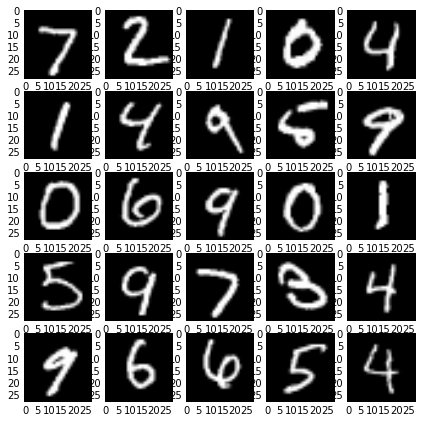

In [8]:
def show_some_digits(N):
    width = 7
    height = 7
    plt.figure(figsize = (width, height))
    
    for n in range(N):
        for m in range(N):
            index = n*N + m
            plt.subplot(N, N, index+1)
            plt.imshow(mnist_test_x_numpy[index].reshape((28,28)), cmap = 'gray')
show_some_digits(5)

the following code defines network. Either this will be logistic regression(no hidden layer) or a feedforward neural network( multilayer perception) with 1 hidden layer. you can edit neural network parameters and leanring strategy using the code below.


In [9]:
num_layers = 2 # This must be either 1 or 2. If 1, this will be a logistic regression. If 2, this will by a multilayer perceptron with 1 hidden layer.

num_hidden = 36
if (num_layers == 1):
    num_hidden = 10

mlp_batch_size = 50
mlp_learning_rate = theano.shared(0.1)

# Uncomment just one of the below to select training strategy

#mlp_update_strategy = lasagne.updates.sgd
#mlp_update_strategy = lasagne.updates.momentum
mlp_update_strategy = lasagne.updates.adadelta

# EASILY EDITED PARAMETERS END HERE
# =================================================================================


num_inputs = 28*28
num_classes = 10

#  pixel-wise weight, --> y = W*x + B
mlp_W_1 = theano.shared(np.random.randn(num_inputs, num_hidden)*0.01)
mlp_B_1 = theano.shared(np.zeros(num_hidden))

mlp_W_2 = theano.shared(np.random.randn(num_hidden, num_classes)*0.01)
mlp_B_2 = theano.shared(np.zeros(num_classes))


mlp_x = T.matrix()

if (num_layers == 2):
    # We have a multilayer perceptron with 1 hidden layer
    mlp_params = [mlp_W_1, mlp_B_1, mlp_W_2, mlp_B_2]
    mlp_y1 = T.nnet.sigmoid(mlp_x.dot(mlp_W_1) + mlp_B_1)
    mlp_y2 = T.nnet.sigmoid(mlp_y1.dot(mlp_W_2) + mlp_B_2)
else:
    # We have a logistic regression (0 hidden layers)
    mlp_params = [mlp_W_1, mlp_B_1]
    mlp_y2 = T.nnet.sigmoid(mlp_x.dot(mlp_W_1) + mlp_B_1)

mlp_target = T.ivector()
# ===============I read here =========================
mlp_cost = T.mean(T.nnet.categorical_crossentropy(mlp_y2, mlp_target))

mlp_updates = mlp_update_strategy(mlp_cost, mlp_params, learning_rate = mlp_learning_rate)

mlp_classification = mlp_y2.argmax(axis=1) 
mlp_correct = T.mean(T.eq(mlp_classification, mlp_target) * 1.0)

mlp_index = T.lscalar() # long int 64 bit type

mlp_train_model = theano.function(
        inputs=[mlp_index],
        outputs=mlp_cost,
        updates=mlp_updates,
        givens={
            mlp_x: mnist_train_x[mlp_index * mlp_batch_size: (mlp_index + 1) * mlp_batch_size],
            mlp_target: mnist_train_y[mlp_index * mlp_batch_size: (mlp_index + 1) * mlp_batch_size]
        }
    )

mlp_test_model = theano.function(
        inputs=[],
        outputs=[mlp_correct, mlp_cost],
        givens={
            mlp_x: mnist_test_x,
            mlp_target: mnist_test_y
        }
    )

mlp_current_train_index = 0
mlp_epoch = 1

the following codes can be used to train the network, at the end of training, it will show the input filters. Make sure you can see useful structures developing during the training. 
- run this code more than once to train the model repeatedly

In [10]:
mlp_W_1.get_value().shape

(784, 36)

Starting minibatch 0 of epoch 1
Ran epoch 1=> training_cost = 0.006084867279220695
Ran epoch 2=> training_cost = 0.0022924070257864136
Ran epoch 3=> training_cost = 0.0014036468855257653
Ran epoch 4=> training_cost = 0.0010091652158166577
Ran epoch 5=> training_cost = 0.0007868244870534744
Ran epoch 6=> training_cost = 0.0006442971481107463
Ran epoch 7=> training_cost = 0.0005452198010637128
Ran epoch 8=> training_cost = 0.00047238795328842064
Ran epoch 9=> training_cost = 0.0004166128343089981
Ran epoch 10=> training_cost = 0.00037254266708226097
Ran epoch 11=> training_cost = 0.0003368503404680117
Ran epoch 12=> training_cost = 0.0003073592584741806
Ran epoch 13=> training_cost = 0.00028258591097537453
Ran epoch 14=> training_cost = 0.00026148452097083584
Ran epoch 15=> training_cost = 0.00024329679156972868
Ran epoch 16=> training_cost = 0.00022745954009366077
Ran epoch 17=> training_cost = 0.0002135457782785768
Ran epoch 18=> training_cost = 0.00020122591768724843
Ran epoch 19=> tr

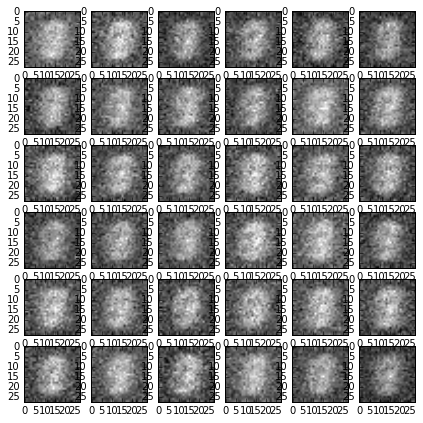

In [11]:
num_epochs = 100
# mlp_learning_rate.set_values = 0.01

num_training_steps = (num_mnist_train // mlp_batch_size) * num_epochs + 1
print('Starting minibatch {} of epoch {}'.format(mlp_current_train_index, mlp_epoch))

for n in range(num_training_steps):
    mlp_current_cost = mlp_train_model(mlp_current_train_index)
    mlp_current_train_index += 1
    if ((mlp_current_train_index + 1) * mlp_batch_size >= num_mnist_train):
        print('Ran epoch {}'.format(mlp_epoch), end = '')
        print('=> training_cost = {}'.format(mlp_current_cost))
        mlp_current_train_index = 0
        mlp_epoch = mlp_epoch + 1
test_correct, test_cost = mlp_test_model()
print('Ran minibatch {} of each {}'.format(mlp_current_train_index, mlp_epoch), end = '')
print('=> training_cost= {}, test_socre = {}, test_correct_classification = {}'.format(
    mlp_current_cost, test_cost, test_correct))

def show_filters(filters):
    width = 7
    height = 7
    plt.figure(figsize = (width, height))
    
    num_filters = filters.shape[1]
    side_length = int(np.ceil(np.sqrt(num_filters))) # np.ceil return i the integer of scalar and i >= scalar
    for n in range(side_length):
        for m in range(side_length):
            if ((m + n*side_length) >= num_filters):
                continue
            plt.subplot(side_length, side_length, m + n*side_length + 1)
            plt.imshow(np.reshape(filters[:, m+n*side_length], (28,28)), cmap = 'gray')
            
show_filters(mlp_W_1.get_value())# feature map
        
    


# Convolution procedure
this section is intended to give you a feel for what convolutions do, we will investigate this by looking at some "hand-crafted" filters and how they affect the output. the first kind of filter we will look at is a block filter. it has dimensions of $K\times K$ and is equal to 1 everywhere. Have a look at the effect of this on an image using the code below. Make sure to try this on your own images if you have some! To do this, look for the filename in the code and change it.


In [12]:
def colour_convolve(img, kernel):
    channels = [scipy.ndimage.convolve(img[:,:,k], kernel) for k in range(img.shape[2])]
    return np.dstack(channels)

def block_convolution_demo(kernel_size = (3,13,2)):
    width = 7
    height = 7
    plt.figure(figsize = (width, height))
    kernel_matrix = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    print("Block averaging kernel")
    kernel_matrix = np.ones((kernel_size, kernel_size))
    image_matrix = plt.imread("data/convolution/leaf_small.png") # using plt to read image
    plt.subplot(1,2,1)
    plt.imshow(image_matrix)
    plt.subplot(1,2,2)
    new_image = colour_convolve(image_matrix, kernel_matrix)
    new_image = new_image - np.min(new_image)
    new_image = new_image / np.max(new_image)
    plt.imshow(new_image)
    print(kernel_matrix)


Block averaging kernel
[[ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.]]


<function __main__.block_convolution_demo>

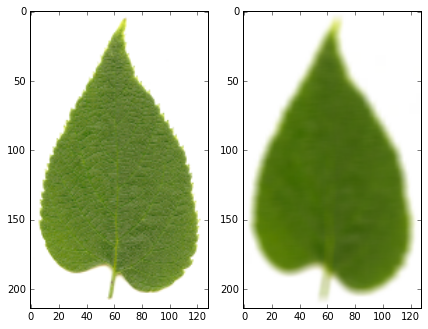

In [13]:
interact(block_convolution_demo)

You should be able see that the leaf is being blurred according to how big of kernel is. What is actually happening, is that for each pixel in the output, an average is being take over the $K\times K$ area in the sorrouding pixels from the input. this lead to a blurring effefct, because the average of the pixel values "mixes" the colours in each of those pixels evenly.
We can also detect edges in images. One classic edge deetection kernel is the so -called Sobel kernel. this comes in horzontal en vertical edge detection versions. Use the following code to experiment with these two variants of the Sobel filter.

In [14]:
def sobel_convolution_demo(vertical_or_horizontal_edges = True):
    width = 9
    height = 9
    plt.figure(figsize = (width, height))
    kernel_matrix = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    if (vertical_or_horizontal_edges):
        kernel_matrix = kernel_matrix.T
#     image_matrix = plt.imread("data/convolution/leaf_small.png")
    image_matrix = plt.imread("G:\\flight photos\\temp\\1.png")
    plt.subplot(1,2,1)
    plt.imshow(image_matrix)
    plt.subplot(1,2,2)
    new_image = colour_convolve(image_matrix, kernel_matrix)
    new_image = new_image - np.min(new_image)
    new_image = new_image / np.max(new_image) 
    plt.imshow(new_image)
    print(kernel_matrix)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


<function __main__.sobel_convolution_demo>

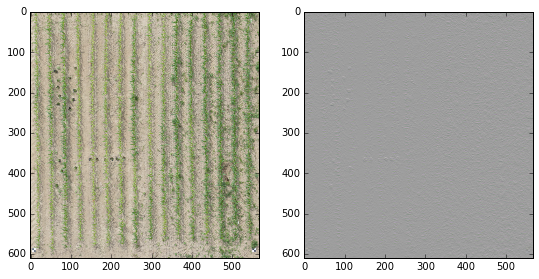

In [15]:
interact(sobel_convolution_demo)

the last hand_crafted filters we will consider are Gabor filters. These kernels are very flexible, and are usually employed to detect edges in images. However, they have the following nice properties:
- you can set scale of the edges that the filter is sensetive to
- you can change the direction of edges to which the filter is sensetive to 
- you can set the frequency band taht the filter is sensetive to. Test out the effect of different parameters by using the codes below. Again, it might be interesting to experiment with some of your own image here as well.


In [16]:
def gabor_convolution_demo(frequency = (0.01, 0.2,0.01), angle = (0,360,10), size = (1,10) ):
    width = 7
    height = 7
    plt.figure(figsize = (width, height))
    kernel_matrix = np.real(gabor_kernel(frequency, theta = 2*np.pi*angle/360.0, 
                                         sigma_x = size, sigma_y = size))
#     image_matrix = plt.imread("data/convolution/leaf_small.png")
    image_matrix = plt.imread("G:\\flight photos\\temp\\1.png")
    plt.subplot(2,2,1)
    plt.imshow(kernel_matrix)
    plt.subplot(2,2,3)
    plt.imshow(image_matrix)
    plt.subplot(2,2,4)
    new_image = colour_convolve(image_matrix, kernel_matrix)
    new_image = new_image - np.min(new_image)
    new_image = new_image / np.max(new_image) 
    plt.imshow(new_image)

<function __main__.gabor_convolution_demo>

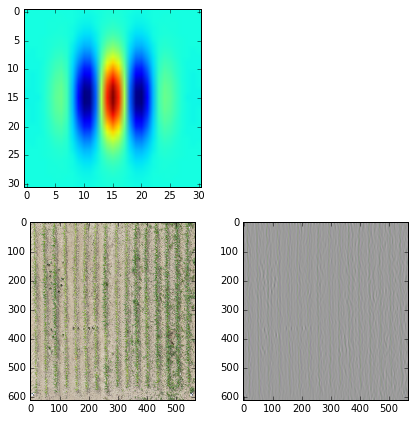

In [17]:
interact(gabor_convolution_demo)

#  Section 4: simple fully convolution networks


convolutional neural networks take a lot of time to train. However, we can get a taste of how their training works by considering a really simple network. we will also use one ONE training image and ONE image for testing. This allows us to fit the model relatively quickly, and the network perfroms surprisingly well.
the data is taken from the freely available[CVPPP](https://www.plant-phenotyping.org/CVPPP2017). please check this for the condiction for use if you wish to work further with this data! Try using the larger dataset on your own to see what you can accomplish.
the data we will use is loaded and displayed using the below code

(530, 500, 3)


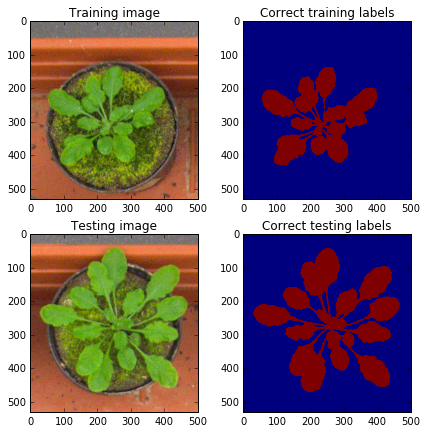

In [18]:
width = 7
height = 7
plt.figure(figsize = (width, height))
# loading training image and get rid of alpha channel
training_image = plt.imread("data/leaves/plant138_rgb.png")[:,:,:3] - 0.5
print(training_image.shape)
plt.subplot(2,2,1)
plt.imshow(training_image + 0.5)
plt.title('Training image')
training_image = training_image[np.newaxis,:,:,:]
training_image.shape

testing_image = plt.imread("data/leaves/plant141_rgb.png")[:,:,:3] - 0.5 
# testing_image = plt.imread("G:\\flight photos\\test1.jpg")[:,:,:3] - 0.5 
plt.subplot(2,2,3)
plt.imshow(testing_image + 0.5)
plt.title("Testing image")
testing_image = testing_image[np.newaxis,:,:,:]

# load training image segmentation and make sure it is a set of probabilities(0.0 1.0)
training_output = plt.imread("data/leaves/plant138_label.png") 
# labelled image
training_output  = np.max(training_output, axis = 2)
training_output = (training_output > 0) *1.0 # turn the different labelled color into the same color 
plt.subplot(2,2,2)
plt.imshow(training_output)
plt.title('Correct training labels')
training_output = training_output[np.newaxis,:,:]

testing_output = plt.imread("data/leaves/plant141_label.png") 
testing_output = np.max(testing_output, axis = 2)
testing_output = (testing_output > 0) * 1.0
plt.subplot(2,2,4)
plt.imshow(testing_output)
plt.title("Correct testing labels")
testing_output = testing_output[np.newaxis,:,:]

#  must learn numpy tutorial

Before we start, we need to define some layer activations. we will use [parametrc rectified linear](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), although technically it is just a leaky ReLU(since we donot train the leakage parameter). for now, just pretend this is a normal rectified linear unit, this is more or less true

In [19]:
def ReLU(X):
    return T.switch(X<0, 0, X)
def PReLU(X, alpha = 0.02):
    return T.switch(X<0, alpha * X, X)

Unfortunately, there is a irritating issue with mixing rectified linear units and softmax outputs in Theano, where there are numerical instabilities that cause training to fail. the log_conf_softwax activation function, and the accompanying conv_cross_entropy_of_logs cost function avoid this problem by using logarithms of the output values. If you ever encounter a lot of NaN(not a number outputs) in your own code in future, this might fix your own problem(many beginners run into this issues!)

In [20]:
def log_conv_softmax(inx):
    mx = inx.max(axis = 1, keepdims = True)
    
    # what the keepdims meaning?????
    return inx - (mx + T.log((T.exp(inx-mx)).sum(axis = 1, keepdims = True)))

def conv_cross_entropy_of_logs(log_y, target):
    return - target * log_y[:,1,:,:] - (1 - target)* log_y[:,0,:,:]

You can ignore the safe_zip function below, it is just there to make sure that all the feature map counts, filter size and activation function are specified by ensuring they all match.

In [21]:
def safe_zip(*args):
    n = len(args[0])
    for a in args:
        assert (n == len(a))
    return zip(*args)

The below code defines the fully convolutional neural network. The one currently defined as follows:
- feature_maps: starts with 3 feature maps (red green and blue of the input image), followed by 7 feature maps, then another 7 feature maps, then another, and then two output feature maps(class1 and class2)

- filter_sizes: ALL the filters are set to size 7

- activations: The activations for the hidden layers are all PReLU, the output is log_conv_softmax.

##### You can experiment with adjusting the network architecture by changing the values just dicussed 

In [22]:
feature_maps = [3,7,7,7,2]
filter_sizes = [7,7,7,7]

activations = [PReLU, PReLU, PReLU, log_conv_softmax]

filters = []
biases = []
for in_maps, out_maps, filter_size, activation in safe_zip(feature_maps[:-1], feature_maps[1:], filter_sizes, activations):
    filters.append(theano.shared(np.random.randn(out_maps, in_maps, filter_size, filter_size) * 0.001))
    biases.append(theano.shared(np.zeros(out_maps)))

#### the following code builds the model function


In [23]:
training_data = np.transpose(training_image, axes = (0,3,1,2))
testing_data = np.transpose(testing_image, axes = (0,3,1,2))
training_target = training_output # [np.newaxis,:,:]
testing_target = testing_output # [np.newaxis, :, :]

x = T.dtensor4("x")
y = x

for filt, bias, activation in zip(filters, biases, activations):
    y = activation(T.nnet.conv2d(y, filt, border_mode = 'half') + bias.dimshuffle(('x',0,'x','x')))
model_func = theano.function([x], y)


the following code plots the model output given its input. Check what this does at the start, then check back when the model has trained a little 


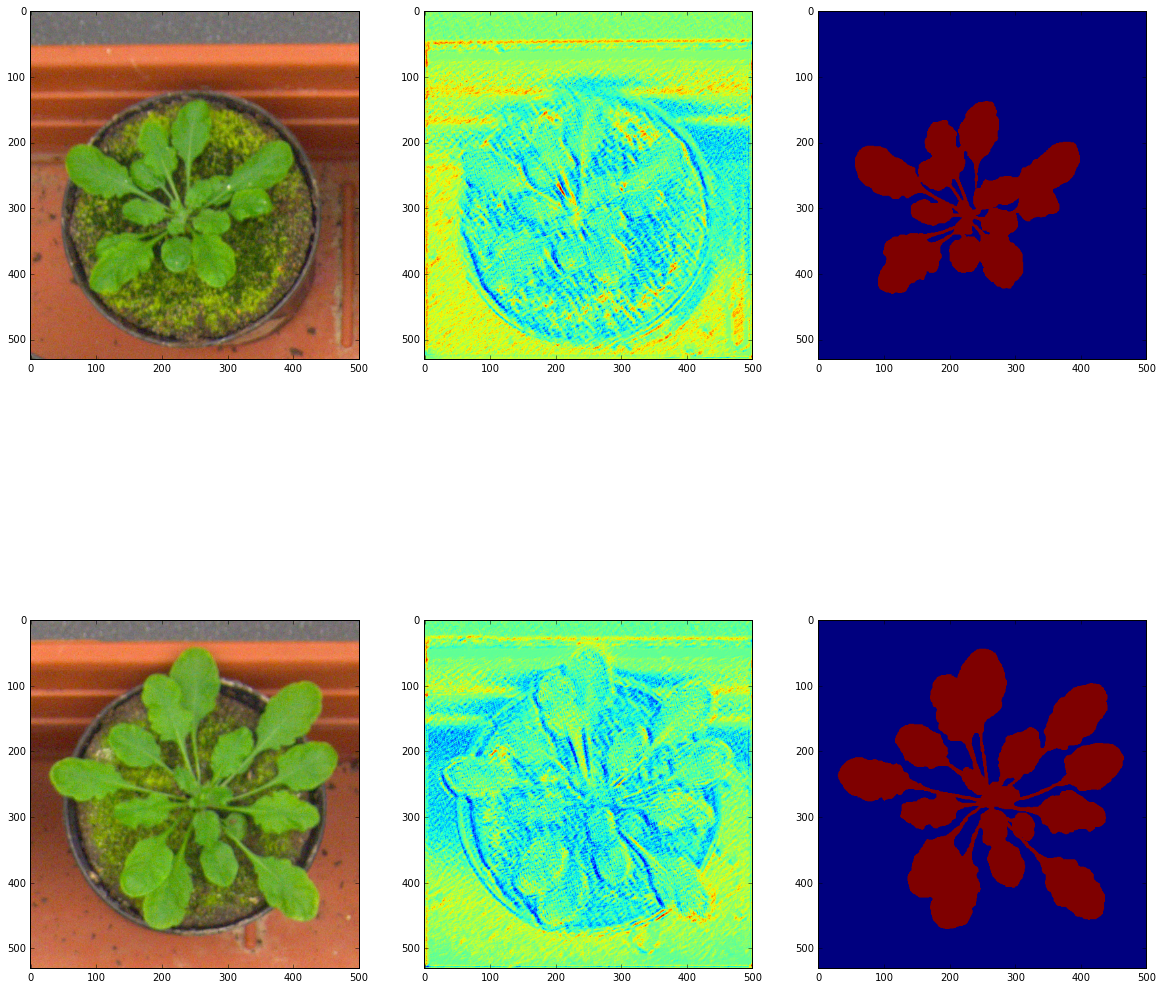

In [24]:
def plot_cov_outputs():
    width = 20
    height = 20
    plt.figure(figsize = (width, height))
    plt.subplot(2,3,1)
    plt.imshow(training_image[0,:,:,:] + 0.5) # why???
    # plottrer (training_image[0,:,:,:])
    plt.subplot(2,3,2)
    result = np.exp(model_func(training_data)[0,1,:,:])
    plt.imshow(result)
    plt.subplot(2,3,3)
    result = training_output[0,:,:]
    plt.imshow(result)
    plt.subplot(2,3,4)
    plt.imshow(testing_image[0,:,:,:] + 0.5)
    # plotter (testing_image[0,:,:,:])
    plt.subplot(2,3,5)
    result = np.exp(model_func(testing_data)[0,1,:,:])
    plt.imshow(result)
    plt.subplot(2,3,6)
    result = testing_output[0,:,:] 
    plt.imshow(result)
plot_cov_outputs()
    

# the following code defines the actual function used to train the convolutions

In [25]:
cov_learning_rate = 0.1
t = T.dtensor3('t')
pixel_cost = conv_cross_entropy_of_logs(y,t)
cost = T.mean(pixel_cost)
grads = T.grad(cost, filters + biases)

updates = lasagne.updates.adadelta(grads, filters + biases, learning_rate = cov_learning_rate)
training_func = theano.function([x,t],[cost], updates = updates)

you can use the following code to train the model. Remeber, you can stop the trainging at any time by pressing stop button above. Runthis code more than one to train model repeatedly


current cost:0.6931471805331186
current cost:0.6912807274226339
current cost:0.6889689212204578
current cost:0.6838971506382843
current cost:0.6674037718106913
current cost:0.6201095145023535
current cost:0.534312804958844
current cost:0.4671827912863655
current cost:0.44784697545129576
current cost:0.361719777652101
current cost:0.2676789612642794
current cost:0.19796178477870663
current cost:0.16950167065606025
current cost:0.15935721319647705
current cost:0.16443180045278713
current cost:0.15465843400055893
current cost:0.14799019298847377
current cost:0.13833789121312842
current cost:0.11801920809139835
current cost:0.09194600528769913


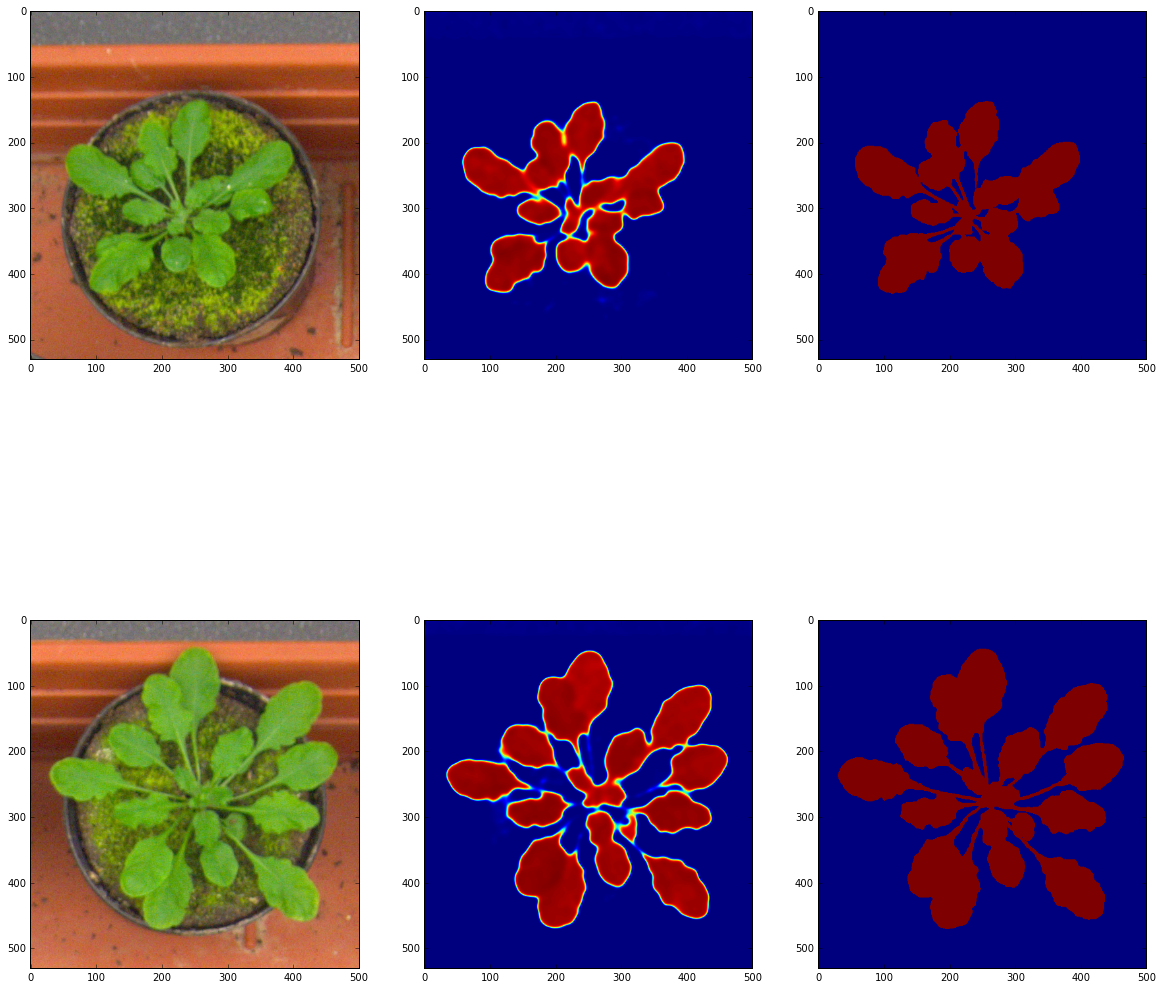

In [26]:
N = 20
# number of times yyou will see a print out of the cost
M = 5
# print every 5th round
for n in range(N):
    print ('current cost:' + str(training_func(training_data, training_target)[0]))
    for m in range(M):
        training_func(training_data, training_target)

plot_cov_outputs()

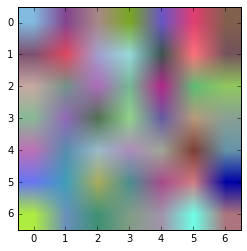

In [30]:
def norm_filter(f):
    mini = np.min(f)
    f = f - mini
    maxi = np.max(f)
    return f / maxi

def plot_filter(filt_num = (1,filters[0].get_value().shape[0])):
    f = filters[0].get_value()[filt_num -1, :,:,:].transpose((1,2,0))
    plt.imshow(norm_filter(f))
    
interact(plot_filter)

# Bonus Selection: Local Contrast Normalization
for certain tasks, applying local contrast normalization to the input image is helpful. The follwoing code illustrates how this might br done, and the effect this has on the input iamge.


In [28]:
import scipy.ndimage.filters

def local_contrast_normalization(img,sigmaX,sigmaY =None, mode ='reflect',truncate = 0.4,sigma_0 = 1e-6):
    
    
    """
    Helps to correct for differences in local absolute illumination and low contrast by performing both 
    subtractive and divisive local contrast normalization. This works by substracting from each
    feature a Gaussian weighted mean of its neighbours, and divides by a Gaussian weighted standard deviation
    
    """
    if (sigmaY == None):
        sigmaY = sigmaX
    floatimg = 1.0 * img
    # This mess, because gaussian filter is stupid enough that it applies a filter across a coulour 
    # channel dimensions as well.
    # so we have to treat each channel independently.
    blurimg = np.dstack(tuple([scipy.ndimage.filters.gaussian_filter(floatimg[:,:,n], sigmaX if (sigmaX == sigmaY)
                                                                    else (sigmaX,sigmaY), 
                                                                    truncate = truncate,
                                                                     mode = mode)
                               for n in range(3)]))
    # blur  = scipy.ndimage.filters.gaussian_filter(floating, sigmaX if (sigmaX = sigmaY) else (sigmaX, sigmaY), truncate
#    = truncate, mode = mode )
    # blurimg = scipy.ndimage.filters.gaussian_filter(floating, sigmaX if (sigmaX == sigmaY) else (sigmaX,sigmaY), truncate=truncate, mode=mode))
    # blurimg = cv2.GaussianBlur(floatimg, ksize, sigmaX, sigmaY = sigmaY, broderType = broderType)
    sqrimg = np.mean((floatimg - blurimg) **2, axis = 2)
    # stdimg = np.sqrt(cv2.GaussianBlur(sqrimg, ksize, sigmaX, sigmaY = sigmaY, borderType = broderType))
    stdimg = np.sqrt(scipy.ndimage.filters.gaussian_filter(
        sqrimg, sigmaX if (sigmaX == sigmaY) else (sigmaX, sigmaY),
        truncate = truncate, mode = mode))
    return (floatimg - blurimg) / (stdimg[:,:,np.newaxis] + sigma_0)

def preprocess_func(img, rad = 50, regularizer = 0.001):
    # return img/256.0
    return local_contrast_normalization(img, rad, sigma_0 = regularizer)

def plotter(x):
    plt.imshow((x/6.0 + 0.5))

<function __main__.interact_local_contrast>

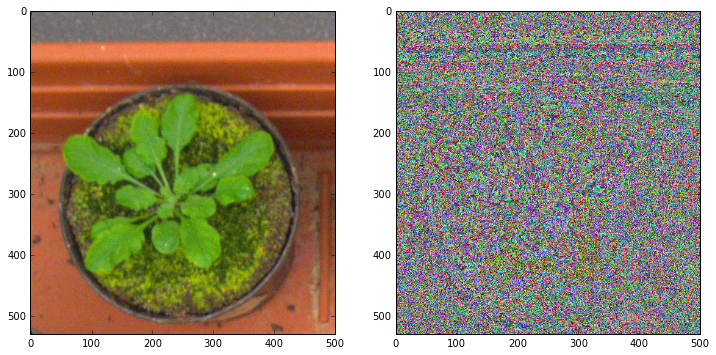

In [29]:
def interact_local_contrast(rad = (1,100)):
    width = 12
    height = 12
    plt.figure(figsize = (width, height))
    training_image = plt.imread("data/leaves/plant138_rgb.png")[:,:,:3]
    plt.subplot(1,2,1)
    plt.imshow(training_image)
    plt.subplot(1,2,2)
    plt.imshow(preprocess_func(training_image, rad = rad))
    
interact(interact_local_contrast)